### More Data Analysis Tools
* data cleaning and preparation
* statistical accumulation
* charting

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# Data Cleaning and Preparation
# NB ensure the external asset is reachable!
df = pd.read_csv('data/risk.csv', index_col='Country') # good idea to havev sensible index
# we will re-name the columns for simplicity
i = ['stpr','ltpr','ster','lter','ori','cir']
df.columns = i
df.sort_index(inplace=True) # it may help if we sort the data
df

,stpr,ltpr,ster,lter,ori,cir
Country,,,,,,
Albania,47.6,35.3,57.7,52.8,52.7,49.70
Algeria,42.1,48.6,45.0,54.5,59.6,51.83
Armenia,49.8,35.5,61.9,60.3,45.9,49.54
Australia,21.7,17.4,23.7,25.4,25.5,22.77
Austria,20.7,10.3,31.0,26.3,24.4,22.38
...,...,...,...,...,...,...
Uzbekistan,37.9,43.9,64.6,56.0,54.5,52.02
Venezuela,59.2,66.1,74.8,74.3,69.3,68.85
Vietnam,18.3,37.0,34.2,36.5,42.7,34.96


In [19]:
# finding interesting data facets
# all the lter > 70
c1 =  df['lter']>70
c2 =  df['ori']<12
df[c1 | c2] #  | means or & means and ! means not

,stpr,ltpr,ster,lter,ori,cir
Country,,,,,,
Cuba,29.8,44.0,70.6,72.8,60.2,56.75
Venezuela,59.2,66.1,74.8,74.3,69.3,68.85
Yemen,77.7,70.4,72.3,76.5,77.3,75.54


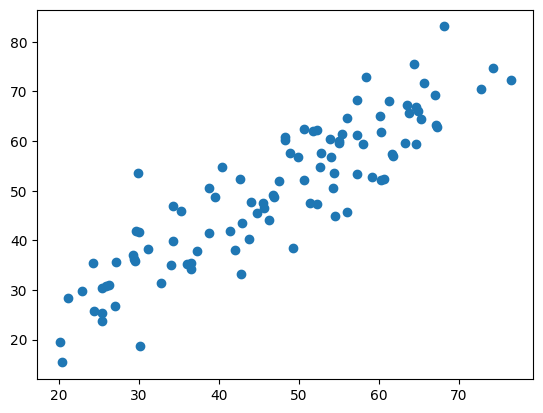

In [30]:
# We may easily chart our data (using matplotlib)
x=df['lter']
y=df['ster']
plt.scatter(x,y) # or plot, bar, hbar, line, pie etc

### Further operations

In [34]:
df.shape # rows by columns NB every column is actially a Series (containing a single data type)
len(df) # how many members
df.dtypes # what is in each Series (each column)

stpr    float64
ltpr    float64
ster    float64
lter    float64
ori     float64
cir     float64
dtype: object

In [62]:
# bring in some problematic data
df2 = pd.read_csv('data/messy.csv', index_col='country')
df2.head(20)
# remember to re-run this cell if we ever need to recover the original data

,stpr,ltpr,ster,lter,or,last_cri
country,,,,,,
Albania,47.6,35.3,57.7,52.8,52.7,47.70
Algeria,42.1,48.6,45.0,54.5,59.6,50.83
Armenia,49.8,35.5,61.9,60.3,45.9,50.54
Australia,21.7,17.4,23.7,25.4,25.5,24.77
Austria,20.7,10.3,31.0,26.3,24.4,20.88
Bahrain,26.9,38.7,49.2,46.8,31.4,39.27
Belgium,40.6,19.9,36.2,29.4,25.7,27.45
Benin,38.3,39.9,52.1,60.3,62.1,50.86
Bermuda,21.5,NaN,NaN,NaN,NaN,NaN


In [65]:
# how to see only 'Bermuda'
# df2.fillna(0, inplace=True)
df2.ffill(inplace=True) # take the previous value and use it to fill the next NaN
df2.loc[['Benin','Bermuda']]
# Risky - first, we no longer ignore NaN since it has avalue. Second, we are skewing the statistics

,stpr,ltpr,ster,lter,or,last_cri
country,,,,,,
Benin,38.3,39.9,52.1,60.3,62.1,50.86
Bermuda,21.5,39.9,52.1,60.3,62.1,50.86


### More Charting

In [68]:
# begin by generating some data values
x = np.arange(5)
y = np.random.rand(5)+2 # all random numbers will be more than 2
(x,y)

(array([0, 1, 2, 3, 4]),
 array([2.9189217 , 2.86338482, 2.92691315, 2.35783037, 2.06531083]))

Text(0.5, 1.0, 'Vertical Bars')

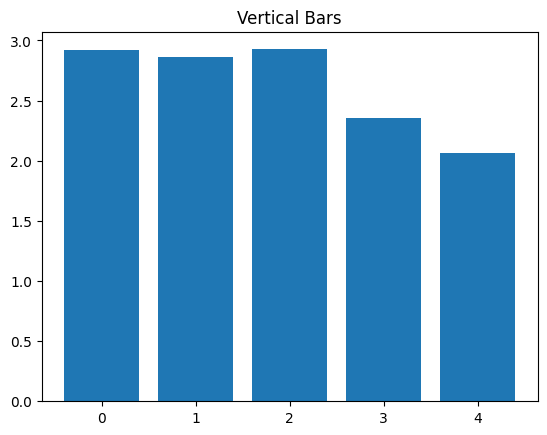

In [71]:
plt.bar(x,y)
plt.title('Vertical Bars')

In [83]:
# line chart
x = np.linspace(0,600000000,1100000000) # start, stop, number of segments
y = np.power(x,2) # this is performant
(x,y)

(array([0.00000000e+00, 5.45454546e-01, 1.09090909e+00, ...,
        5.99999999e+08, 5.99999999e+08, 6.00000000e+08],
       shape=(1100000000,)),
 array([0.00000000e+00, 2.97520662e-01, 1.19008265e+00, ...,
        3.59999999e+17, 3.59999999e+17, 3.60000000e+17],
       shape=(1100000000,)))

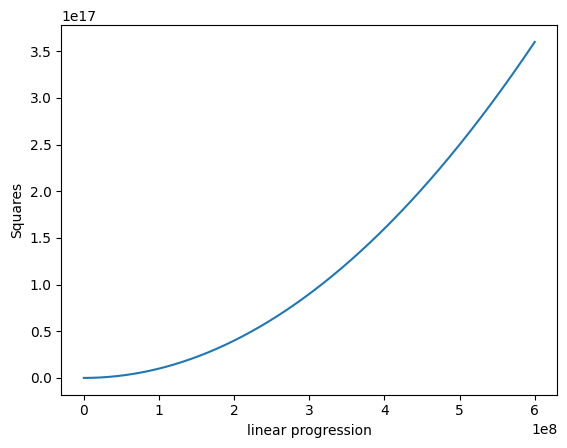

In [84]:
plt.xlabel('linear progression')
plt.ylabel('Squares')
plt.plot(x,y)
        